In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Information inside the files:

#Other d_types definitions:
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
particle_dtype = np.dtype(
    [
        ("pdg", np.uint32),
        ("energy", np.float32),
        ("position", np.float32,(3)),
        ("direction", np.float32,(2)),
        ("time", np.float32),
        ("length", np.float32)
    ]
)
#http://software.icecube.wisc.edu/documentation/projects/neutrino-generator/weightdict.html
weight_dtype = np.dtype(
    [
        ('PrimaryNeutrinoAzimuth',np.float32),
        ('TotalColumnDepthCGS',np.float32),
        ('MaxAzimuth',np.float32),
        ('SelectionWeight',np.float32),
        ('InIceNeutrinoEnergy',np.float32),
        ('PowerLawIndex',np.float32),
        ('TotalPrimaryWeight',np.float32),
        ('PrimaryNeutrinoZenith',np.float32),
        ('TotalWeight',np.float32),
        ('PropagationWeight',np.float32),
        ('NInIceNus',np.float32),
        ('TrueActiveLengthBefore',np.float32),
        ('TypeWeight',np.float32),
        ('PrimaryNeutrinoType',np.float32),
        ('RangeInMeter',np.float32),
        ('BjorkenY',np.float32),
        ('MinZenith',np.float32),
        ('InIceNeutrinoType',np.float32),
        ('CylinderRadius',np.float32),
        ('BjorkenX',np.float32),
        ('InteractionPositionWeight',np.float32),
        ('RangeInMWE',np.float32),
        ('InteractionColumnDepthCGS',np.float32),
        ('CylinderHeight',np.float32),
        ('MinAzimuth',np.float32),
        ('TotalXsectionCGS',np.float32),
        ('OneWeightPerType',np.float32),
        ('ImpactParam',np.float32),
        ('InteractionType',np.float32),
        ('TrueActiveLengthAfter',np.float32),
        ('MaxZenith',np.float32),
        ('InteractionXsectionCGS',np.float32),
        ('PrimaryNeutrinoEnergy',np.float32),
        ('DirectionWeight',np.float32),
        ('InjectionAreaCGS',np.float32),
        ('MinEnergyLog',np.float32),
        ('SolidAngle',np.float32),
        ('LengthInVolume',np.float32),
        ('NEvents',np.uint32),
        ('OneWeight',np.float32),
        ('MaxEnergyLog',np.float32),
        ('InteractionWeight',np.float32),
        ('EnergyLost',np.float32)
    ]
)


keys_dtype = np.dtype(  
        [
        ("passed", np.bool_),
        ("header", np.bool_),
        ("raw_data", np.bool_),
        ("weights", np.bool_),
        ("mctree", np.bool_), 
        ("cvstats", np.bool_),
        ("pulses", np.bool_)
           ]
)






#Data files contain events which passed the charge cuts of Qstr = 400PE and Qtotal = 1000PE AND their images:
#Top level of Data file:
info_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("image", np.float32, (300, 60)),
        ("neutrino", particle_dtype),
        ("meson", particle_dtype),
        ("q_tot", np.float32),
        ("cog", np.float32,(3)),
        ("q_st", np.float32),
        ("st_pos", np.float32,(3)),
        ("st_num", np.float32),
        ("distance", np.float32),
        ("weight", weight_dtype),

    ]
)
#Top level of Weight file:
#Weight files contain some information about ALL the events in i3 files, but have NO images
w_info_dtype = np.dtype(
    [   
        ("id", id_dtype),
        ("energy", np.float32),
        ("pdg", np.float32),
        ("weight", weight_dtype),
        ("keys", keys_dtype)
    ]
)



In [ ]:
#If you wanna calculate them yourself:
#get the network trained by Doug a while ago:
from keras.models import load_model
model = load_model('/data/dfc13/DoublePulse/Models/Arch01/DP_model_6006.h5')
#model.summary()

Using TensorFlow backend.
W0212 12:51:21.800317 139997603665664 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0212 12:51:21.836433 139997603665664 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0212 12:51:21.855103 139997603665664 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0212 12:51:21.899818 139997603665664 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph

In [3]:
#Data for NuTauCC 
data_tc = np.load('/fastio2/dasha/double_pulse/data_NuTauCC.npy', mmap_mode='r')
#Data for NuECC
data_ec = np.load('/fastio2/dasha/double_pulse/data_NuECC.npy', mmap_mode='r')

In [4]:
mean = 0.0008596053 
std = 0.011836949

def batch_classify(events):
    data = np.empty((len(events), 300, 60, 1))
    for i, event in enumerate(events):
        data[i] = ((event['image'] - mean)/std).reshape(1, 300, 60, 1)
        
    return model.predict(data)

In [5]:
%%time
to_stack = [data_tc[i] for i in range(100)] + [data_ec[i] for i in range(100)]
classified = batch_classify(to_stack)

NameError: name 'model' is not defined

In [1]:
#Weight Info for all events in i3 files (also NuTauCC and NuECC)
weights_tc = np.load('/fastio2/dasha/double_pulse/weights_NuTau.npy', mmap_mode='r')
weights_ec = np.load('/fastio2/dasha/double_pulse/weights_NuE.npy', mmap_mode='r')

NameError: name 'np' is not defined

In [9]:
#To access info:
print(data_tc['neutrino'][0])
print(data_tc['neutrino']['energy'][0])

[(4294967280, 231464.84, [-468.13614, 1410.8896 , 1947.8267 ], [0.78544605, 1.8112881 ], 2989.0232, 1757.0872)]
[231464.84]


Event 0 info:  [(4294967280, 231464.84, [-468.13614, 1410.8896 , 1947.8267 ], [0.78544605, 1.8112881 ], 2989.0232, 1757.0872)]
Event 1 info:  [(16, 2880998.8, [ 573.0816, 1551.6466, 1947.7854], [0.63338596, 1.5602827 ], 2017.3586, 2329.5605)]


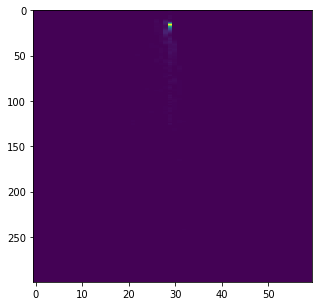

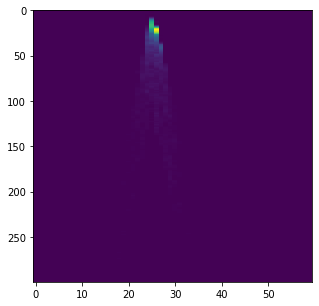

In [36]:
#to access image
for i, im in enumerate(data_tc['image'][:2]):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(im.reshape(300,60), interpolation='nearest', aspect='auto', cmap= 'viridis')
    print("Event {0} info: ".format(i), data_tc['neutrino'][i])

In [42]:
#How to get DeepLearing network probabilities
#Those I already calculated are here:
preds_ec = np.load('/fastio2/dasha/double_pulse/preds_NuECC.npy')
preds_tc = np.load('/fastio2/dasha/double_pulse/preds_2.npy')

print(len(preds_ec),len(preds_tc),preds_ec[0:1],preds_tc[0:1] )
#The array has a bit of a weird shape, an extra dimention that isn't nessesary
preds_tc = preds_tc.reshape((preds_tc.shape[0],2))
print(len(preds_ec),len(preds_tc),preds_ec[0:1],preds_tc[0:1] )


4287608 1476948 [[[0.8157125 0.1842875]]] [[[0.08030367 0.91969633]]]
4287608 1476948 [[[0.8157125 0.1842875]]] [[0.08030367 0.91969633]]


In [1]:
#If you wanna calculate them yourself:
#get the network trained by Doug a while ago:
from keras.models import load_model
model = load_model('/data/dfc13/DoublePulse/Models/Arch01/DP_model_6006.h5')
#model.summary()

Using TensorFlow backend.
W1219 17:03:07.837923 140185471043328 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1219 17:03:07.862358 140185471043328 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1219 17:03:07.880236 140185471043328 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1219 17:03:07.925190 140185471043328 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph

In [38]:
#values for normalization, I am currently using. Probably need to be changed later.
mean = 0.0008596053 
std = 0.011836949
#calculate the network predictions
preds = []
for im in data_tc['image'][:2]:
    im = im.reshape(1,300,60,1)
    im = (im-mean)/std
    pred = model.predict(im)
    preds.append(pred)
preds = np.array(preds)
print(len(preds),preds)

2 [[[0.08030367 0.91969633]]

 [[0.37107354 0.62892646]]]


In [ ]:
#Calculating weights
#IceCube tutorial: http://software.icecube.wisc.edu/documentation/projects/neutrino-generator/weightdict.html#oneweightpertype
#change the shape of data
#data_tc = data.reshape(data.shape[0])

In [13]:
NFiles = 11999 #Number if i3 files in the directory
EventsPerFile = 10000 #From the weightDict
index = -2.13 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 0.9e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
d_flux = flux_at_100tev*((data_tc['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm 
w_flux = flux_at_100tev*((weights_tc['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

# one weights has units of [GeV cm2 sr / Number of total simulated events]
d_weights = data_tc['weight']['OneWeight']*d_flux/(NFiles*EventsPerFile) # units of Hz per simulated events event
w_weights = weights_tc['weight']['OneWeight']*w_flux/(NFiles*EventsPerFile) # units of Hz per simulated events event

d_rate = np.sum(d_weights) # total rates in Hz for events that passes the cuts
w_rate = np.sum(w_weights) # total rates in Hz for all events in the files

print(d_rate*livetime,w_rate*livetime)

16.294573635195217 68.11459153178455


Text(0.5, 0, 'True $E_{\\nu}$ (GeV)')

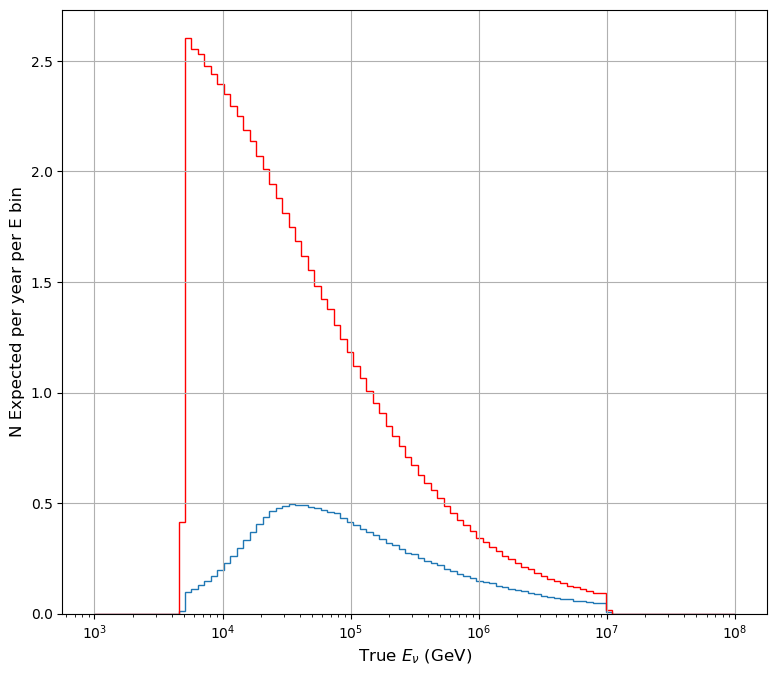

In [14]:
#Weighted energy distribution
fig = plt.figure(dpi=100, figsize=(20,8))
ax=fig.add_subplot(121)
bins = np.logspace(3, 8, 100)
plt.hist((data_tc['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights*livetime, histtype='step', label ="after cuts")
plt.hist((weights_tc['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights*livetime, histtype='step', color = 'r', label = "all")

plt.grid(True)
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)

In [43]:
sz = data_tc.shape[0]
print(preds_tc[:,1])
mask_50 = (0.5 <= preds_tc[:,1])
mask_100 = 1.0 == preds_tc[:,1] 

print(sz,len(data_tc['weight'][mask_50])/sz*100,len(data_tc['weight'][mask_100])/sz*100)
print(len(data_tc['weight'][mask_50]), len(data_tc['weight'][mask_100]))

[0.91969633 0.62892646 0.31031    ... 0.56807387 0.9995944  0.4893322 ]
1476948 57.791743514328196 2.852707068901546
853554 42133


In [45]:
NFiles = 11999
EventsPerFile = 10000
index = -2.13 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 0.9e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
d_flux_50 = flux_at_100tev*((data_tc['weight'][mask_50]['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_100 = flux_at_100tev*((data_tc['weight'][mask_100]['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

# one weights has units of [GeV cm2 sr / Number of total simulated events]
d_weights_50 = data_tc['weight'][mask_50]['OneWeight']*d_flux_50/(NFiles*EventsPerFile) # units of Hz per simulated events event
d_weights_100 = data_tc['weight'][mask_100]['OneWeight']*d_flux_100/(NFiles*EventsPerFile) # units of Hz per simulated events event

d_rate_50 = np.sum(d_weights_50) # total rates in Hz
d_rate_100 = np.sum(d_weights_100) # total rates in Hz

print("P>50", d_rate_50*livetime)
print("P=100", d_rate_100*livetime)

P>50 6.996197471929034
P=100 0.25332777842517856
